# 4 Data Preprocessing & Training

## 4.1 Introduction
In the modeling part, we want to predict real data from sensor data along with the effect of humidity and tempearture. For that purpose, I am going to try different models like linear, random forest and decision trees. After finding the best model for each polution type, I will evaluate the importance of humidity and temperature in data evaluation.

## 4.1 Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

## 4.2 Loading data

In [2]:

df=pd.read_csv('Desktop/Springboard/Capstone 2/wrangledata.csv', parse_dates=[['Date','Time']])

## 4.3. Predicting Real data from Sensor, Humidity and Temperature by mean & Linear Model

### 4.3.1.1 Predicting CO_real data by mean

First we try mean to predict the result. Then we use different models to see if the models predictions are better than just using simple mean.

In [3]:
CO=df[['CO_Real', 'Temperature','Absolute Humidity','CO_Sensor']]
CO.dropna(inplace=True)
X_CO=CO[['CO_Sensor', 'Temperature','Absolute Humidity']]
y_CO=CO['CO_Real']


/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


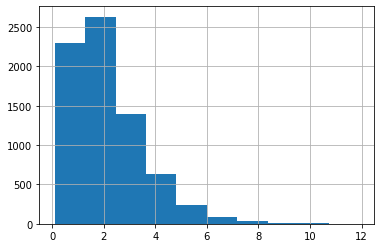

In [4]:
# Distribution of CO real data
CO['CO_Real'].hist();

In [5]:
X_train,X_test, y_train,y_test=train_test_split(X_CO, y_CO, test_size=0.2, random_state=42)

In [6]:
train_mean=y_train.mean()
train_mean

2.115268085106384

In [7]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[2.11526809]])

In [8]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([2.11526809, 2.11526809, 2.11526809, 2.11526809, 2.11526809])

In [9]:
r2_score(y_train, y_tr_pred)

0.0

As expected, if we use the average value as our prediction, we get an  𝑅2  of zero on our training set. What if we use this "model" to predict unseen values from the test set? 

In [10]:
y_te_pred = train_mean * np.ones(len(y_test))
r2_score(y_test, y_te_pred)

-0.002376576868025726

We can expect performance on a test set to be slightly worse than on the training set. As we are getting an  𝑅2  of zero on the training set, there's nowhere to go but negative!

### 4.3.1.2 Predicting CO_real data by linear Model

In [11]:
pipe_CO = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [12]:
model_CO=pipe_CO.fit(X_train, y_train)



In [13]:
y_tr_pred = model_CO.predict(X_train)
y_te_pred = model_CO.predict(X_test)


In [14]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(0.780620261531566, 0.785082356591238)

In [15]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)


(0.47510434033164217, 0.48257497639971814)

In [16]:
pipe_CO.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

### 4.3.1.3 Assess performance by cross-validation

In [17]:
cv_results = cross_validate(pipe_CO, X_train, y_train, cv=5)

In [18]:
cv_scores = cv_results['test_score']
cv_scores

array([0.79118403, 0.76661482, 0.80020276, 0.77882384, 0.76360431])

In [19]:
np.mean(cv_scores), np.std(cv_scores)

(0.7800859532361126, 0.01401828968467631)

In [20]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.75, 0.81])

The above result shows the 95% confidence interval for cross-validation scores.

### 4.3.1.4. Investigate CO linear model without considering temperature and humidity

The results show high linear trend for predicting real data from sensor data for CO. The test data had same r2 score than train data. Now let's see what happen to r2 score and mean absolute error if we don't use humidity and temperature factors.

In [21]:
#Predicting CO real data just by Using Sensor Data
X_CO_S=CO[['CO_Sensor']]
y_CO_S=CO['CO_Real']
X_train_s,X_test_s, y_train_s,y_test_s=train_test_split(X_CO_S, y_CO_S, test_size=0.2, random_state=42)

In [22]:
pipe_CO_s = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

pipe_CO_s.fit(X_train_s, y_train_s)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [23]:
y_tr_pred_s = pipe_CO_s.predict(X_train_s)
y_te_pred_s = pipe_CO_s.predict(X_test_s)

In [24]:
r2_score(y_train_s, y_tr_pred_s), r2_score(y_test_s, y_te_pred_s)


(0.7710770504106415, 0.7801953788008271)

In [25]:
mean_absolute_error(y_train_s, y_tr_pred_s), mean_absolute_error(y_test_s, y_te_pred_s)


(0.4891480680103889, 0.4926617045919368)

As you see in the results, by eliminating the humidity and temperature, the r2 score of the linear model decreased alittle bit(from 0.785 to 0.78). The mean absolute error also increased by 0.1( from 0.482 to 0.492).

### 4.3.2. Predicting NOX_real data by mean & linear Model

### 4.3.2.1 Predicting NOX_real data by mean

In [26]:
NOX=df[['NOX_Real', 'Temperature','Absolute Humidity','NOX_Sensor']]
NOX.dropna(inplace=True)
X_NOX=NOX[['NOX_Sensor', 'Temperature','Absolute Humidity']]
y_NOX=NOX['NOX_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


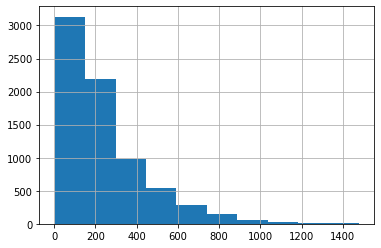

In [27]:
NOX['NOX_Real'].hist();

In [28]:
X_train1,X_test1, y_train1,y_test1=train_test_split(X_NOX, y_NOX, test_size=0.2, random_state=42)


In [29]:


train_mean_NOX=y_train1.mean()
train_mean_NOX

241.50371872887087

In [30]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train1, y_train1)
dumb_reg.constant_

array([[241.50371873]])

In [31]:
y_tr_pred1 = dumb_reg.predict(X_train1)
r2_score(y_train1, y_tr_pred1)

0.0

In [32]:
y_te_pred1 = train_mean_NOX * np.ones(len(y_test1))
r2_score(y_test1, y_te_pred1)

-0.0002807153212971425

### 4.3.2.2 Predicting NOX_real data by linear model

In [33]:
pipe_NOX = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
pipe_NOX.fit(X_train1, y_train1)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [34]:
y_tr_pred1 = pipe_NOX.predict(X_train1)
y_te_pred1 = pipe_NOX.predict(X_test1)

In [35]:
r2_score(y_train1, y_tr_pred1), r2_score(y_test1, y_te_pred1)


(0.557540675198916, 0.5984587401159507)

In [36]:
mean_absolute_error(y_train1, y_tr_pred1), mean_absolute_error(y_test1, y_te_pred1)

(95.99669221399176, 92.65543376969211)

The R2 score is low but let's investigate cross validation score. 

### 4.3.2.3 Assess performance by cross-validation

In [37]:
cv_results = cross_validate(pipe_NOX, X_train1, y_train1, cv=5)

In [38]:
cv_scores = cv_results['test_score']
cv_scores

array([0.54271628, 0.58485506, 0.54272933, 0.55084498, 0.56082536])

In [39]:
np.mean(cv_scores), np.std(cv_scores)

(0.556394199998588, 0.015711548709120306)

In [40]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.52, 0.59])

The above result shows the 95% confidence interval for cross-validation scores for NOX real data using linear model.

### 4.3.2.4 Investigate NOX linear model without considering temperature and humidity

In [41]:

X_NOX_s=NOX[['NOX_Sensor']]
y_NOX_s=NOX['NOX_Real']

In [42]:
X_train1_s,X_test1_s, y_train1_s,y_test1_s=train_test_split(X_NOX_s, y_NOX_s, test_size=0.2, random_state=42)


In [43]:
pipe_NOX_s = make_pipeline(
    StandardScaler(),
    LinearRegression())
pipe_NOX_s.fit(X_train1_s, y_train1_s)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [44]:
y_tr_pred1_s = pipe_NOX_s.predict(X_train1_s)
y_te_pred1_s = pipe_NOX_s.predict(X_test1_s)

In [45]:
r2_score(y_train1_s, y_tr_pred1_s), r2_score(y_test1_s, y_te_pred1_s)


(0.42097728403091395, 0.46622639706523206)

In [46]:
mean_absolute_error(y_train1_s, y_tr_pred1_s), mean_absolute_error(y_test1_s, y_te_pred1_s)

(112.71517625219452, 110.86325459082043)

These results show that unlike the CO, temperature and humidity are very important to predict NOX data. The r2 score decreased from 0.6 to 0.47 without considering temperature and humidity. The mean absolute error increased by 20%.

In [47]:
mae_diff=(110.86-92.76)/92.76
mae_diff

0.19512721000431213

The linear model seems not good for predicting real data for NOX. Next step would be trying other models like decision trees or ensemble methods.

### 4.3.3. Predicting NO2_real data by mean & linear Model

### 4.3.3.1 Predicting NO2_real data by mean

In [48]:
NO2=df[['NO2_Real', 'Temperature','Absolute Humidity','NO2_Sensor']]
NO2.dropna(inplace=True)
X_NO2=NO2[['NO2_Sensor', 'Temperature','Absolute Humidity']]
y_NO2=NO2['NO2_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


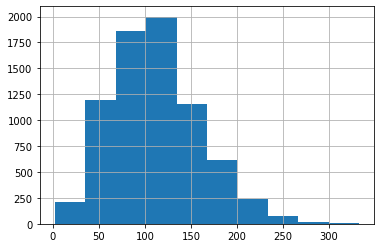

In [49]:
NO2['NO2_Real'].hist();

In [50]:
X_train2,X_test2, y_train2,y_test2=train_test_split(X_NO2, y_NO2, test_size=0.2, random_state=42)


In [51]:
train_mean_NO2=y_train2.mean()
train_mean_NO2

111.8517078119716

In [52]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train2, y_train2)
dumb_reg.constant_

array([[111.85170781]])

In [53]:
y_tr_pred2 = dumb_reg.predict(X_train2)
r2_score(y_train2, y_tr_pred2)

0.0

In [54]:
y_te_pred2 = train_mean_NO2 * np.ones(len(y_test2))
r2_score(y_test2, y_te_pred2)

-0.0009249023823847402

### 4.3.3.2 Predicting NO2_real data by linear model

In [55]:

pipe_NO2 = make_pipeline(
    StandardScaler(),
    LinearRegression())

pipe_NO2.fit(X_train2, y_train2)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [56]:
y_tr_pred2 = pipe_NO2.predict(X_train2)
y_te_pred2 = pipe_NO2.predict(X_test2)

In [57]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)


(0.3640451998859632, 0.3624940363019371)

Some linear relationship observed for NO2 data. But it seems the NO2 sensor shows alot of noise as well.Let's see the cross validation score.

### 4.3.3.3 Assess performance by cross-validation

In [58]:
cv_results = cross_validate(pipe_NO2, X_train2, y_train2, cv=5)

In [59]:
cv_scores = cv_results['test_score']
cv_scores

array([0.38794366, 0.37045193, 0.3379021 , 0.3480525 , 0.36369232])

In [60]:
np.mean(cv_scores), np.std(cv_scores)

(0.361608502290905, 0.017446191816581486)

In [61]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.33, 0.4 ])

The above result shows the 95% confidence interval for cross-validation scores for NO2 real data using linear model.

### 4.3.3.4 Investigate NO2 linear model without considering temperature and humidity

In [62]:
X_NO2_s=NO2[['NO2_Sensor']]
y_NO2_s=NO2['NO2_Real']

In [63]:
X_train2_s,X_test2_s, y_train2_s,y_test2_s=train_test_split(X_NO2_s, y_NO2_s, test_size=0.2, random_state=42)


In [64]:
pipe_NO2_s = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

pipe_NO2_s.fit(X_train2_s, y_train2_s)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [65]:
y_tr_pred2_s = pipe_NO2_s.predict(X_train2_s)
y_te_pred2_s = pipe_NO2_s.predict(X_test2_s)

In [66]:
r2_score(y_train2_s, y_tr_pred2_s), r2_score(y_test2_s, y_te_pred2_s)


(0.023040785338169778, 0.030506723263019953)

Interestingly, by removing temperature and humidity, the linear correlation of NO2 real and sensor data decreased significantly. So, we definitely need to incorporate temperature and humidity and we need different model than linear model.

### 4.3.4. Predicting NMH_real data by mean & linear Model

### 4.3.4.1 Predicting NMH_real data by mean

In [67]:
NMH=df[['Non Metanic Hydrocarbons_Real', 'Temperature','Absolute Humidity','Non Metanic Hydrocarbons_Sensor']]
NMH.dropna(inplace=True)
X_NMH=(NMH[['Non Metanic Hydrocarbons_Sensor', 'Temperature','Absolute Humidity']])
y_NMH=NMH['Non Metanic Hydrocarbons_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


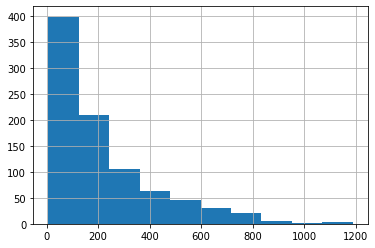

In [68]:
NMH['Non Metanic Hydrocarbons_Real'].hist();

In [69]:
X_train3,X_test3, y_train3,y_test3=train_test_split(X_NMH, y_NMH, test_size=0.2, random_state=42)


In [70]:
train_mean_NMH=y_train3.mean()
train_mean_NMH

215.8166431593794

In [71]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train3, y_train3)
dumb_reg.constant_

array([[215.81664316]])

In [72]:
y_tr_pred3 = dumb_reg.predict(X_train3)
r2_score(y_train3, y_tr_pred3)

0.0

In [73]:
y_te_pred3 = train_mean_NMH * np.ones(len(y_test3))
r2_score(y_test3, y_te_pred3)

-0.0050558614802238555

### 4.3.4.2 Predicting NMH_real data by linear model

In [74]:
pipe_NMH = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
model_NMH=pipe_NMH.fit(X_train3, y_train3)

In [75]:
y_tr_pred3 = model_NMH.predict(X_train3)
y_te_pred3 = model_NMH.predict(X_test3)

In [76]:
r2_score(y_train3, y_tr_pred3), r2_score(y_test3, y_te_pred3)


(0.7676774070439664, 0.784331010160472)

In [77]:
mean_absolute_error(y_train3, y_tr_pred3), mean_absolute_error(y_test3, y_te_pred3)


(74.21273832311586, 69.46864716248633)

### 4.3.4.3 Assess performance by cross-validation

In [78]:
cv_results = cross_validate(pipe_NMH, X_train3, y_train3, cv=5)

In [79]:
cv_scores = cv_results['test_score']
cv_scores

array([0.72941083, 0.76985405, 0.75019799, 0.77800029, 0.77238699])

In [80]:
np.mean(cv_scores), np.std(cv_scores)

(0.759970029846442, 0.017923854004142845)

In [81]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.72, 0.8 ])

The above result shows the 95% confidence interval for cross-validation scores for NMH real data using linear model.

### 4.3.4.4 Investigate NMH linear model without considering temperature and humidity

In [82]:
X_NMH_s=(NMH[['Non Metanic Hydrocarbons_Sensor']])
y_NMH_s=NMH['Non Metanic Hydrocarbons_Real']

In [83]:
X_train3_s,X_test3_s, y_train3_s,y_test3_s=train_test_split(X_NMH_s, y_NMH_s, test_size=0.2, random_state=42)

In [84]:
pipe_NMH_s = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
pipe_NMH_s.fit(X_train3_s, y_train3_s)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [85]:
y_tr_pred3_s = pipe_NMH_s.predict(X_train3_s)
y_te_pred3_s = pipe_NMH_s.predict(X_test3_s)

In [86]:
r2_score(y_train3_s, y_tr_pred3_s), r2_score(y_test3_s, y_te_pred3_s)

(0.7673802259199454, 0.7829319242345765)

In [87]:
mean_absolute_error(y_train3_s, y_tr_pred3_s), mean_absolute_error(y_test3_s, y_te_pred3_s)

(74.16613125831815, 69.41265128414861)

As you see above, the temperature and humidity does not contribute much in predicting NMH real data. 

### 4.3.5. Summary

The results showed that temperature and humidity affect more the correlation between sensor and real data for NOX and NO2, but they did not contribute much in predicting non-methanic hydrocarbon real data. The CO data also slightly improved by contributing temperature and humidity.

None methanic hydrocarbon and CO had strong linear relationship of sensor and real data but we need better model with better r2 score for NO2 and NOx.

 In the next step, we try decision tree regressor.

## 4.4 Predicting Real data from Sensor, Humidity and Temperature by Decision Tree

### 4.4.1. Predicting CO_real data by Decision Tree Model

### 4.4.1.1 Predicting CO_real data by Decision Tree Model using cross-validation

In [88]:
CO_Tree = DecisionTreeRegressor()


In [89]:
DT_cv_results = cross_validate(CO_Tree, X_train, y_train, cv=5)

In [90]:
DT_cv_scores = DT_cv_results['test_score']
DT_cv_scores

array([0.6836801 , 0.60315697, 0.63115794, 0.65396478, 0.62683373])

In [91]:
np.mean(DT_cv_scores), np.std(DT_cv_scores)

(0.639758704895449, 0.02724561367426981)

Now, let's see if we can improve the correlation score by hyperparameter tunning.

### 4.4.1.2 Predicting CO_real data by Decision Tree Model using hyperparameter tunning.

In [92]:
param_dict={"max_depth":range(1,10), "min_samples_split":range(2,10),"min_samples_leaf":range(1,5)}

In [93]:
DT_CO = GridSearchCV(CO_Tree, param_grid=param_dict, cv=5)


In [94]:
DT_CO.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split':

In [95]:
DT_CO.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [96]:
DT_CO.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [97]:
DT_CO.best_score_

0.7824168719402433

In [98]:
y_tr_pred = DT_CO.predict(X_train)
y_te_pred = DT_CO.predict(X_test)

In [99]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(0.8207774723020749, 0.8018207745178478)

In [100]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)


(0.4326207573194276, 0.4714821261883829)

Based on the results, decision tree is slightly better than linear model for predicting CO real data and results improved alot by hyperparameter tuning.

### 4.4.2. Predicting NOX_real data by Decision Tree Model

### 4.4.2.1 Predicting NOX_real data by Decision Tree Model using cross-validation

In [101]:
NOX_Tree = DecisionTreeRegressor()

DT_cv_results1 = cross_validate(NOX_Tree, X_train1, y_train1, cv=5)

In [102]:
DT_cv_scores1 = DT_cv_results1['test_score']
DT_cv_scores1

array([0.62110892, 0.61227068, 0.64443853, 0.66660542, 0.68040748])

In [103]:
np.mean(DT_cv_scores1), np.std(DT_cv_scores1)

(0.6449662066085973, 0.025933703931646505)

Now, let's see if we can improve the correlation score by hyperparameter tunning.

### 4.4.2.2 Predicting NOX_real data by Decision Tree Model using hyperparameter tunning.

In [104]:
DT_NOX = GridSearchCV(NOX_Tree, param_grid=param_dict, cv=5)


DT_NOX=DT_NOX.fit(X_train1, y_train1)


In [105]:
DT_NOX.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8}

In [106]:
DT_NOX.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [107]:
DT_NOX.best_score_

0.7642234443554166

In [108]:
y_tr_pred1 = DT_NOX.predict(X_train1)
y_te_pred1 = DT_NOX.predict(X_test1)

In [109]:
r2_score(y_train1, y_tr_pred1), r2_score(y_test1, y_te_pred1)


(0.8313774244340634, 0.8002398937991638)

In [110]:
mean_absolute_error(y_train1, y_tr_pred1), mean_absolute_error(y_test1, y_te_pred1)


(56.76766415416256, 62.17249408635622)

The decision tree model is definitely better than linear model for predicting NOX real data. The R2 score increased from 0.6 to 0.8 by using decision tree model. Also, hyperparameter tunning improved alot r2 score.

The mean absolte error also decreased from 92 to 62.

### 4.4.3. Predicting NO2_real data by Decision Tree Model

### 4.4.3.1 Predicting NO2_real data by Decision Tree Model using cross-validation

In [111]:
NO2_Tree = DecisionTreeRegressor()

DT_cv_results2 = cross_validate(NO2_Tree, X_train2, y_train2, cv=5)

In [112]:
DT_cv_scores2 = DT_cv_results2['test_score']
DT_cv_scores2

array([0.19759406, 0.18755259, 0.19087284, 0.13344088, 0.21477918])

In [113]:
np.mean(DT_cv_scores2), np.std(DT_cv_scores2)

(0.18484791032917658, 0.027366560669289088)

The cross validation score is very low. Let's see if we can improve the score by hyperparameter tunning.

### 4.4.3.2 Predicting NO2_real data by Decision Tree Model using hyperparameter tunning

In [114]:
DT_NO2 = GridSearchCV(NO2_Tree, param_grid=param_dict, cv=5)

DT_NO2.fit(X_train2, y_train2)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split':

In [115]:
DT_NO2.best_params_

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 9}

In [116]:
DT_NO2.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [117]:
DT_NO2.best_score_

0.4926177329430238

In [118]:
y_tr_pred2 = DT_NO2.predict(X_train2)
y_te_pred2 = DT_NO2.predict(X_test2)

In [119]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)


(0.620607098856111, 0.4960353489296476)

Decision tree model have better r2 score than linear model but still the r2 score is low. The r2 score increased from 0.36 to 0.5. So, we will try random forest model in the next step.

### 4.4.4. Predicting NMH_real data by Decision Tree Model

### 4.4.4.1 Predicting NMH_real data by Decision Tree Model using cross-validation

In [120]:
NMH_Tree = DecisionTreeRegressor()

DT_cv_results3 = cross_validate(NMH_Tree, X_train3, y_train3, cv=5)

In [121]:
DT_cv_scores3 = DT_cv_results3['test_score']
DT_cv_scores3

array([0.67577574, 0.63103557, 0.75639635, 0.73030062, 0.67174252])

In [122]:
np.mean(DT_cv_scores3), np.std(DT_cv_scores3)

(0.6930501600041848, 0.0447181562960877)

Let's see if we can improve the score by hyperparameter tunning.

### 4.4.4.2 Predicting NMH_real data by Decision Tree Model using hyperparameter tunning

In [123]:
DT_NMH = GridSearchCV(NMH_Tree, param_grid=param_dict, cv=5)

DT_NMH.fit(X_train3, y_train3)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split':

### 4.4.4.1 Predicting NMH_real data by Decision Tree Model using cross-validation

In [124]:
DT_NMH.best_params_

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [125]:
DT_NMH.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [126]:
DT_NMH.best_score_

0.8034229627707541

In [127]:
y_tr_pred3 = DT_NMH.predict(X_train3)
y_te_pred3 = DT_NMH.predict(X_test3)

In [128]:
r2_score(y_train3, y_tr_pred3), r2_score(y_test3, y_te_pred3)


(0.8435151430992167, 0.7714876285517799)

In [129]:
mean_absolute_error(y_train3, y_tr_pred3), mean_absolute_error(y_test3, y_te_pred3)


(54.73685214748391, 63.83208551609532)

Both linear and decision tree models had the same r2 score but decision tree has slightly less mean absolute error.It seems linear regression is better model than decision tree since it's simpler.

## 4.5 Predicting Real data from Sensor, Humidity and Temperature by Random Forest

### 4.5.1.1 Predicting CO_real data by Random Forest Model using cross-validation

In [130]:
RF_CO = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=47))
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=15)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
}
grid_params

{'randomforestregressor__n_estimators': [10,
  13,
  19,
  26,
  37,
  51,
  71,
  100,
  138,
  193,
  268,
  372,
  517,
  719,
  1000],
 'standardscaler': [StandardScaler(copy=True, with_mean=True, with_std=True),
  None]}

In [131]:
RF_cv_results = cross_validate(RF_CO, X_train, y_train, cv=5)

In [132]:
RF_cv_scores = RF_cv_results['test_score']
RF_cv_scores

array([0.82513007, 0.77759732, 0.81297115, 0.80510564, 0.79849223])

In [133]:
np.mean(RF_cv_scores), np.std(RF_cv_scores)

(0.8038592826929503, 0.0158462722345807)

### 4.4.4.2 Predicting CO_real data by Random Forest Model using hyperparameter tunning

In [134]:
rf_grid_CO = GridSearchCV(RF_CO, param_grid=grid_params, cv=5, n_jobs=-1)

In [135]:
rf_grid_CO=rf_grid_CO.fit(X_train, y_train)

In [136]:
rf_grid_CO.best_params_

{'randomforestregressor__n_estimators': 1000, 'standardscaler': None}

In [137]:
rf_grid_CO.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_score=False, random_state=47,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [138]:
rf_grid_CO.best_score_

0.805926314155534

In [139]:
y_tr_pred = rf_grid_CO.predict(X_train)
y_te_pred = rf_grid_CO.predict(X_test)

In [140]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(0.9739145079099213, 0.8154723406189244)

In [141]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)


(0.15949014468085107, 0.44667985023825724)

The best model to predict CO_real based on r2 score and mean absolute error is random forest model but considering the complexity, it might be easier to use linear model.

### 4.5.2. Predicting NOX_real data by Random Forest Model


### 4.5.2.1 Predicting NOX_real data by Random Forest Model using cross-validation

In [142]:
RF_NOX = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=47))

RF_cv_results1 = cross_validate(RF_NOX, X_train1, y_train1, cv=5)

In [143]:
RF_cv_scores1 = RF_cv_results1['test_score']
RF_cv_scores1

array([0.76762573, 0.78396514, 0.81148549, 0.79015739, 0.82723747])

In [144]:
np.mean(RF_cv_scores1), np.std(RF_cv_scores1)

(0.7960942445722702, 0.020974309322983428)

The score is not better than decision tree model. So, let's see if we can improve it by hyperparameter tunning.

### 4.5.2.2 Predicting NOX_real data by Random Forest Model using hyperparameter tunning

In [145]:
rf_grid_NOX = GridSearchCV(RF_NOX, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_NOX=rf_grid_NOX.fit(X_train1, y_train1)

In [146]:
rf_grid_NOX.best_params_

{'randomforestregressor__n_estimators': 517,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [147]:
rf_grid_NOX.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=517, n_jobs=None,
                                       oob_score=False, random_state=47,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [148]:
rf_grid_NOX.best_score_

0.7979344345681794

In [149]:
y_tr_pred1 = rf_grid_NOX.predict(X_train1)
y_te_pred1 = rf_grid_NOX.predict(X_test1)

In [150]:
r2_score(y_train1, y_tr_pred1), r2_score(y_test1, y_te_pred1)


(0.9724324682848117, 0.8266465621480936)

In [151]:
mean_absolute_error(y_train1, y_tr_pred1), mean_absolute_error(y_test1, y_te_pred1)


(21.555481119947476, 57.00852632129227)

Again, RandomForest model is better than the other models in predicting NOX real data.The r2 score improved from 0.80 to 0.83.The mean absolute error also slightly decreased but given the complexity of random forest, maybe it's still better to use decision tree model.

### 4.5.3. Predicting NO2_real data by Random Forest Model


### 4.5.3.1 Predicting NO2_real data by Random Forest Model using cross-validation

In [152]:
RF_NO2 = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=47))

RF_cv_results2 = cross_validate(RF_NO2, X_train2, y_train2, cv=5)

In [153]:
RF_cv_scores2 = RF_cv_results2['test_score']
RF_cv_scores2

array([0.54177386, 0.54761978, 0.51336583, 0.52943088, 0.57096246])

In [154]:
np.mean(RF_cv_scores2), np.std(RF_cv_scores2)

(0.5406305614238134, 0.019178004975676385)

By using cross validation, we see r2 score is better for random forest than decision tree(0.5). Now, let's explore the hyperparameter tunning.

### 4.5.3.2 Predicting NOX_real data by Random Forest Model using hyperparameter tunning

In [155]:
rf_grid_NO2 = GridSearchCV(RF_NO2, param_grid=grid_params, cv=5, n_jobs=-1)

rf_grid_NO2=rf_grid_NO2.fit(X_train2, y_train2)

In [156]:
rf_grid_NO2.best_params_

{'randomforestregressor__n_estimators': 1000, 'standardscaler': None}

In [157]:
rf_grid_NO2.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_score=False, random_state=47,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [158]:
rf_grid_NO2.best_score_

0.5458410936480851

In [159]:
y_tr_pred2 = rf_grid_NO2.predict(X_train2)
y_te_pred2 = rf_grid_NO2.predict(X_test2)

In [160]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)


(0.9397400598825675, 0.5602394905917133)

Random Forest is better than the other models in predicting NO2 real data but the r2 score is still low.It seems that for NO2, it's better to use random forest model.

### 4.5.4. Predicting NMH_real data by Random Forest Model


### 4.5.4.1 Predicting NMH_real data by Random Forest Model using cross-validation

In [161]:
RF_NMH = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=47))

RF_cv_results3 = cross_validate(RF_NMH, X_train3, y_train3, cv=5)

In [162]:
RF_cv_scores3 = RF_cv_results3['test_score']
RF_cv_scores3

array([0.77798859, 0.83286415, 0.82397128, 0.82000562, 0.78784319])

In [163]:
np.mean(RF_cv_scores3), np.std(RF_cv_scores3)

(0.8085345650624085, 0.021554561984800866)

The random forest is slightly better than linear model. Let's explore the hyperparameters:

### 4.5.4.2 Predicting NMH_real data by Random Forest Model using hyperparameter tunning


In [164]:
rf_grid_NMH = GridSearchCV(RF_NMH, param_grid=grid_params, cv=5, n_jobs=-1)

rf_grid_NMH=rf_grid_NMH.fit(X_train3, y_train3)

In [165]:
rf_grid_NMH.best_params_

{'randomforestregressor__n_estimators': 268,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [166]:
rf_grid_NMH.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=268, n_jobs=None,
                                       oob_score=False, random_state=47,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [167]:
rf_grid_NMH.best_score_

0.8101772153699853

In [168]:
y_tr_pred3 = rf_grid_NMH.predict(X_train3)
y_te_pred3 = rf_grid_NMH.predict(X_test3)

In [169]:
r2_score(y_train3, y_tr_pred3), r2_score(y_test3, y_te_pred3)


(0.9752842541863741, 0.7747017796793216)

In [170]:
mean_absolute_error(y_train3, y_tr_pred3), mean_absolute_error(y_test3, y_te_pred3)


(19.95937624992106, 62.450025155123264)

Based on the results, random forest is a little bit better than linear model in predicting NMH data.

Overall, we use linear model as the best model because of simplicity

## 4.6.Feature Importance & Model Coefficients

### 4.6.1. Model coefficients for CO_real data

 We don't have feature imporatance with linear model. Also, we saw by eliminating temperature and humidity the model score did not change alot. So, I just plot the coefficients using bar plot in linear model.

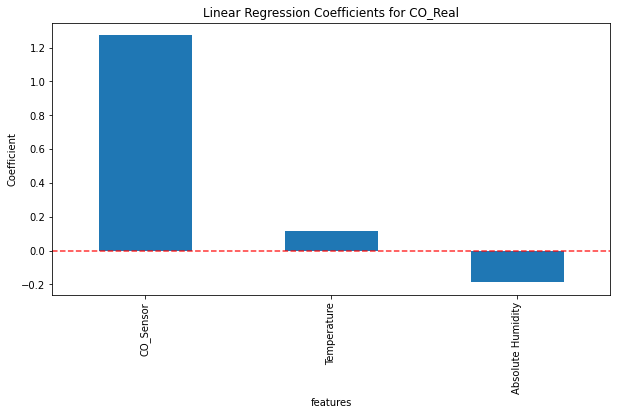

In [171]:

plt.subplots(figsize=(10, 5))
importance=model_CO.named_steps['linearregression'].coef_

Linear_feat_imps = pd.Series(importance, index=X_train.columns)
Linear_feat_imps.plot(kind='bar')
plt.axhline(y=0, c='r', ls='--', alpha=0.8, label='Baseline')

plt.xlabel('features')
plt.ylabel('Coefficient')
plt.title('Linear Regression Coefficients for CO_Real');

It seems humidity and temperature also cantributed alittle bit in predicting CO_real data.Humidity has negative effect while temperature has positive effect. Also, it seems humidity is more important than temperature but still the main factor is CO_sensor and other parameters effects are 10X more than other factors.

### 4.6.2. Feature importance for NOX_real data

As I chose decision tree because of more simplicity than random forest, I investigated decision tree feature importance here.

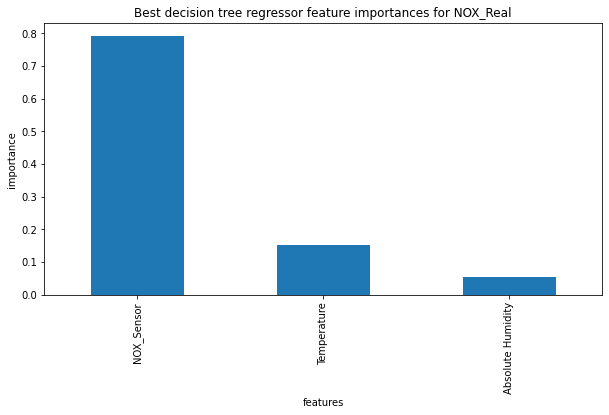

In [172]:

plt.subplots(figsize=(10, 5))
imps_DT = DT_NOX.best_estimator_.feature_importances_
DT_imps = pd.Series(imps_DT, index=X_train1.columns).sort_values(ascending=False)
DT_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best decision tree regressor feature importances for NOX_Real');

It looks like temperature and humidity both affect prediction of NOX_real data but temperature affect the NOX real data more than humidity.

### 4.6.3. Feature importance for NO2_real data

The random forest was chosen for NO2 real data because of best performance. Now, let's see the feature importance here.

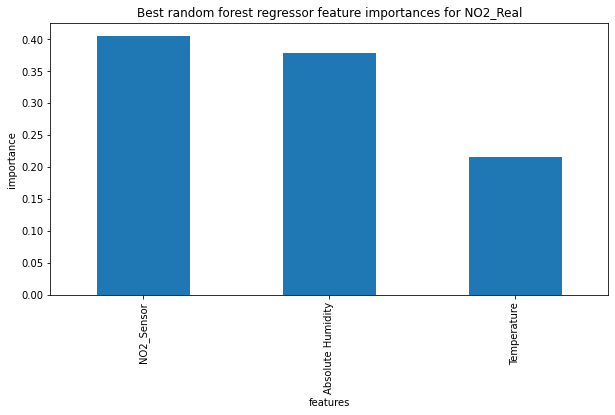

In [173]:

plt.subplots(figsize=(10, 5))
rf_imps = rf_grid_NO2.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(rf_imps, index=X_train2.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances for NO2_Real');

High effects of humidity and temperature was seen for predicting NO2 real data. It seems environmental factors affect alot the sensor data for NO2 and cause difference between sensor and real data.

### 4.6.4. Model coefficients for NMH_real data

As linear model was chosen for non-methanic hydrocarbon data,the coefficients is investigated here.

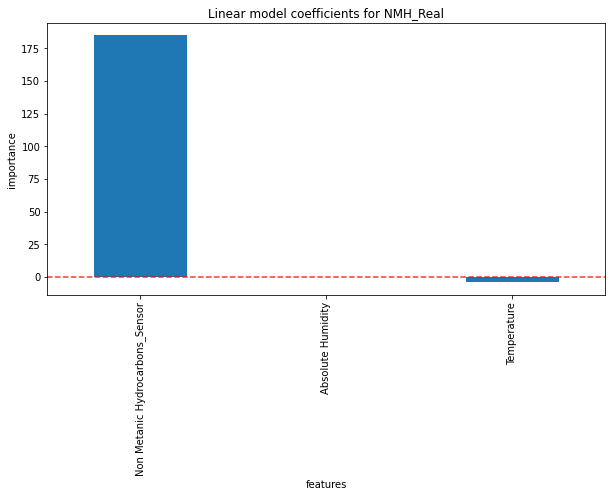

In [174]:
plt.subplots(figsize=(10, 5))
linear_imps3 = model_NMH.named_steps['linearregression'].coef_
linear_feat_imps3 = pd.Series(linear_imps3, index=X_train3.columns).sort_values(ascending=False)
plt.axhline(y=0, c='r', ls='--', alpha=0.8, label='Baseline')

linear_feat_imps3.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Linear model coefficients for NMH_Real');

As you see above the main factor in predicting NMH real data is sensor data. Very small effects of temperature also observed but humidity did not have any role in predicting NMH real data.

### 4.7. Save best model object from pipeline¶


In [175]:
from sklearn import __version__ as sklearn_version
import datetime
import os
import pickle


best_model_CO = model_CO
best_model_NOX = DT_NOX.best_estimator_
best_model_NO2 = rf_grid_NO2.best_estimator_
best_model_NMH = model_NMH

#best_model.version = __version__
best_model_CO.pandas_version = pd.__version__
best_model_NOX.pandas_version = pd.__version__
best_model_NO2.pandas_version = pd.__version__
best_model_NMH.pandas_version = pd.__version__

best_model_CO.numpy_version = np.__version__
best_model_NOX.numpy_version = np.__version__
best_model_NO2.numpy_version = np.__version__
best_model_NMH.numpy_version = np.__version__

best_model_CO.sklearn_version = sklearn_version
best_model_NOX.sklearn_version = sklearn_version
best_model_NO2.sklearn_version = sklearn_version
best_model_NMH.sklearn_version = sklearn_version

best_model_CO.X_columns = [col for col in X_train.columns]
best_model_NOX.X_columns = [col for col in X_train1.columns]
best_model_NO2.X_columns = [col for col in X_train2.columns]
best_model_NMH.X_columns = [col for col in X_train3.columns]

best_model_CO.build_datetime = datetime.datetime.now()
best_model_NOX.build_datetime = datetime.datetime.now()
best_model_NO2.build_datetime = datetime.datetime.now()
best_model_NMH.build_datetime = datetime.datetime.now()

    
modelpath = 'Desktop/Springboard/Capstone2'
if not os.path.exists(modelpath):
    os.mkdir(modelpath)
CO_path = os.path.join(modelpath, 'CO_model.pkl')
NOX_path = os.path.join(modelpath, 'NOX_model.pkl')
NO2_path = os.path.join(modelpath, 'NO2_model.pkl')
NMH_path = os.path.join(modelpath, 'NMH_model.pkl')



if not os.path.exists(CO_path):
    with open(CO_path, 'wb') as f:
        pickle.dump(best_model_CO, f)
        
        
if not os.path.exists(NOX_path):
    with open(NOX_path, 'wb') as f:
        pickle.dump(best_model_NOX, f)
        
        
if not os.path.exists(NO2_path):
    with open(NO2_path, 'wb') as f:
        pickle.dump(best_model_NO2, f)        
        
if not os.path.exists(NMH_path):
    with open(NMH_path, 'wb') as f:
        pickle.dump(best_model_NMH, f)


## 4.8. Summary

The data modeling showed that random forest model had the better performance than linear regression and decision tree for modeling of all polution types. 
Given the complexity of random forest model, linear regression was chosen for non methanic hydrocarbons and CO real data. For NOX data, decision tree model was chosen and random forest was chosen for NO2 data since the other models had very low scores.
In the next part, I will investigate more the variables effect on real data prediction.